# 乐理笔记本

## 乐音体系

### 八度

所谓do ri mi fa suo la xi... 一般被编码为C D E F G B A.这8个音称为一个八度。存在数个八度，它们听起来类似但又有所不同。不同的正是它们的音高，这时一个相同name的音可以称之为比另一个音高一个八度。加入这种octave的乐音体系可以使用类似C4的记法，表示从大字一向右数第四个八度里的C音，这个音经常用来定位，由于是钢琴正中间的音还称为中央C。还有一种包括小字开头的麻烦记法，因为在计算机记录麻烦在这里就被抛弃了。

### 十二平均律

一个八度音域(频率域)可以用等比数列分成十二个音，八度的八个音对应十二个音里的八个音。那为什么不直接用十二音呢？因为八度体系提出的比十二平均律早，实际之前的划分方式实际也不是精确的十二平均律的方式，只是大概在那个地方（用一种基于等分的方法）。而且丢掉的4个音实际也不常用，所以就这样了。

我们使用下述代码显示一个大概八度内（A4-A5）音的频率与12个音的关系

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from music21 import environment,corpus,note

exe_path="C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe"

environment.set("musescoreDirectPNGPath",exe_path)
environment.set("musicxmlPath",exe_path)
#一般windows上musescores配置有问题，需要手动指定修复

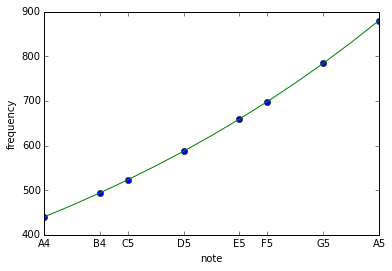

In [2]:
step=['A4','B4','C5','D5','E5','F5','G5','A5']
fl=[note.Note(s).pitch.frequency for s in step]
ml=[0,2,3,5,7,8,10,12]

plt.plot(ml,fl,'o')
plt.plot(range(0,13),np.logspace(1,2,13,base=2)*220)
plt.xticks(ml,step)
plt.xlabel('note')
plt.ylabel("frequency")
plt.show()

可以看到8个音里有的离得远有的离得近，这两种距离分别称为差一个全音与差一个半音。为了使用遗失的4个音，可以使用升半音符号 `#` 或降半音符号 `b` 来取得。当然一般这两个符号和谱号一起在小节开头起确定基音的作用。（五线谱上相同音符号的序列随基音不同表示不同的音符序列，未做说明谱号是高音谱号且没有升降修正）。五线谱十分脑残的一点是它相同的“距离”表示的音程是不一样的，有的是全音有的是半音，因为它是直接从八度建立的体系，这时你应该比照八度而不是十二平均律来看五线谱，然后又用十二平均律来取到具体的音（加上谱号和升降号的修正），简直无妄之灾。

In [3]:
#升降调符号 升调 # sharp 降调 b flat，但在music21中使用-表示降调。那尼玛就不能用+表示升调吗
bflat=note.Note('B-2')
print '下面的B-2即Bb'
print 'B-2的名',bflat.pitch.name
print 'B-2的12平均律位置（一个八度内）',bflat.pitch.pitchClass
print 'B-2的八度位置（以大字一开头数个八度内的哪个）',bflat.pitch.octave
print 'B-2的变调符号的值(从标准B降了一个半音)',bflat.pitch.accidental.alter

下面的B-2即Bb
B-2的名 B-
B-2的12平均律位置（一个八度内） 10
B-2的八度位置（以大字一开头数个八度内的哪个） 2
B-2的变调符号的值(从标准B降了一个半音) -1.0


In [4]:
#从bflat变调到D3,通过施加一个大三度。
d=bflat.transpose("M3")
print 'D3 名',d.pitch.name
print 'D3 12平均律位置',d.pitch.pitchClass
print 'D3 八度位置',d.pitch.octave

D3 名 D
D3 12平均律位置 2
D3 八度位置 3


为什么加一个大三度就从B-2变成了D3呢？因为大三度是指音程是两个全音距离，即4个半音（12平均律单位距离）距离。
于是B- -> 2-10 -> 2-11 -> 3-0 3-1 -> 3-2 -> D3

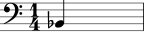

In [5]:
bflat.show()

## midi编码

每个八度有十二个音，将一系列这样的十二个音排在一起加上边角可以形成钢琴的88个音，或midi的127个音。midi的中央C（C4）是60，C#/Db是61,以此类推。

In [7]:
d.pitch.midi

50

In [8]:
C4=note.Note('C4')
C4.pitch.midi

60

## 时长

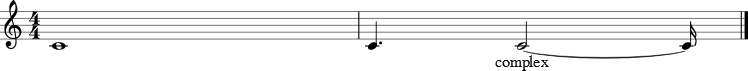

In [12]:
from music21 import duration,stream

d1=duration.Duration('whole')
d2=duration.Duration(1.5)
d3=duration.Duration(2.25)

n1=note.Note()
n1.duration=d1
n2=note.Note()
n2.duration=d2
n3=note.Note()
n3.duration=d3

n3.addLyric("complex")

#n1.show()
#n2.show()
#n3.show()

stream1=stream.Stream()
stream1.append(n1)
stream1.append(n2)
stream1.append(n3)
stream1.show()

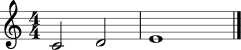

In [16]:
s2=stream.Stream()

s2.append(note.Note('C4',type='half'))
s2.append(note.Note('D4',type="half"))
s2.append(note.Note('E4',type='whole'))

s2.show()

In [18]:
#s2.show('midi')

In [23]:
s2[0]

<music21.note.Note C>

In [26]:
from music21 import converter

box=converter.parse('custom.ove')

ConverterFileException: cannot find a format extensions for: custom.ove